<a href="https://colab.research.google.com/github/percivalyan/peramalan-harga-beras-fuzzy/blob/main/PeramalanHargaBerasFuzzy_DataExcel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install library yang diperlukan
!pip install -q gspread oauth2client gspread_dataframe openpyxl

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Upload file xlsx yang telah diunduh ke Google Colab
from google.colab import files
uploaded = files.upload()

# Periksa data yang dibaca
print(df.head())

Saving harga_beras.xlsx to harga_beras (6).xlsx
   Periode  Tahun      Bulan    Harga  \
0        1   2021        Mei  8710.44   
1        2   2021       Juni  8694.95   
2        3   2021      Juli   8481.43   
3        4   2021    Agustus  8688.77   
4        5   2021  September  8588.59   

                                               Fuzzy  
0  [0.4823384750850058, 0.5176615249149944, 0, 0,...  
1  [0.4969729578566576, 0.5030270421433427, 0, 0,...  
2  [0.6987001858362019, 0.30129981416379836, 0, 0...  
3  [0.5028116346499961, 0.4971883653500041, 0, 0,...  
4  [0.5974586639633661, 0.4025413360366341, 0, 0,...  


In [ ]:
# 1. Penentuan Nilai Maksimum dan Minimum Data
harga_max = df['Harga'].max()
harga_min = df['Harga'].min()
print(f"Nilai Maksimum Harga: {harga_max}")
print(f"Nilai Minimum Harga: {harga_min}")

Nilai Maksimum Harga: 13675.0
Nilai Minimum Harga: 8481.43


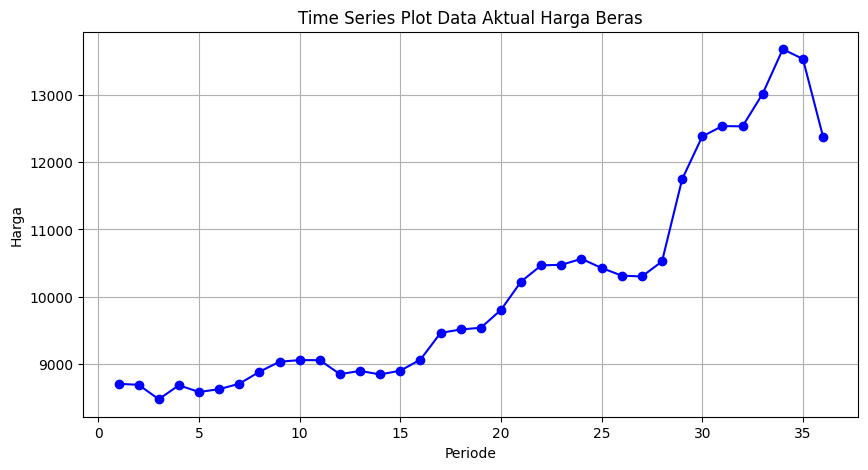

In [ ]:
# 2. Time Series Plot Data Aktual
plt.figure(figsize=(10,5))
plt.plot(df['Periode'], df['Harga'], marker='o', linestyle='-', color='b')
plt.title('Time Series Plot Data Aktual Harga Beras')
plt.xlabel('Periode')
plt.ylabel('Harga')
plt.grid(True)
plt.show()

In [ ]:
# 3. Penentuan Semesta Pembicaraan U
U_max = harga_max + (0.1 * harga_max)
U_min = harga_min - (0.1 * harga_min)
print(f"Semesta Pembicaraan U: [{U_min}, {U_max}]")

Semesta Pembicaraan U: [7633.287, 15042.5]


In [ ]:
# 4. Menghitung Panjang Interval
num_intervals = 7  # Contoh jumlah interval
interval_length = (U_max - U_min) / num_intervals
print(f"Panjang Interval: {interval_length}")

Panjang Interval: 1058.459


In [ ]:
# 5. Rata-Rata Selisih Absolut
mean_abs_diff = df['Harga'].diff().abs().mean()
print(f"Rata-Rata Selisih Absolut: {mean_abs_diff}")

Rata-Rata Selisih Absolut: 227.9451428571429


In [ ]:
# 6. Menghitung Basis Interval
intervals = [U_min + i * interval_length for i in range(num_intervals + 1)]
print(f"Basis Interval: {intervals}")

Basis Interval: [7633.287, 8691.746000000001, 9750.205, 10808.664, 11867.123, 12925.582, 13984.041000000001, 15042.5]


In [ ]:
# 7. Menghitung Banyaknya Himpunan Fuzzy
num_fuzzy_sets = num_intervals
print(f"Banyaknya Himpunan Fuzzy: {num_fuzzy_sets}")

Banyaknya Himpunan Fuzzy: 7


In [ ]:
# 8. Menentukan Nilai Tengah Himpunan Fuzzy
fuzzy_centers = [(intervals[i] + intervals[i + 1]) / 2 for i in range(num_intervals)]
print(f"Nilai Tengah Himpunan Fuzzy: {fuzzy_centers}")

Nilai Tengah Himpunan Fuzzy: [8162.516500000001, 9220.9755, 10279.4345, 11337.8935, 12396.3525, 13454.8115, 14513.2705]


In [ ]:
# 9. Mendefinisikan Derajat Keanggotaan Himpunan Fuzzy
def fuzzy_membership(x, centers, length):
    memberships = []
    for c in centers:
        membership = max(1 - abs(x - c) / length, 0)
        memberships.append(membership)
    return memberships

# 10. Fuzzyfikasi Data
df['Fuzzy'] = df['Harga'].apply(lambda x: fuzzy_membership(x, fuzzy_centers, interval_length))
print("Data Fuzzyfikasi:")
print(df[['Harga', 'Fuzzy']])

Data Fuzzyfikasi:
       Harga                                              Fuzzy
0    8710.44  [0.4823384750850058, 0.5176615249149944, 0, 0,...
1    8694.95  [0.4969729578566576, 0.5030270421433427, 0, 0,...
2    8481.43  [0.6987001858362019, 0.30129981416379836, 0, 0...
3    8688.77  [0.5028116346499961, 0.4971883653500041, 0, 0,...
4    8588.59  [0.5974586639633661, 0.4025413360366341, 0, 0,...
5    8630.83  [0.5575515915118117, 0.44244840848818845, 0, 0...
6    8711.19  [0.4816298978042609, 0.5183701021957394, 0, 0,...
7    8888.50  [0.3141127809390828, 0.6858872190609173, 0, 0,...
8    9038.14  [0.17273744188485451, 0.8272625581151456, 0, 0...
9    9061.74  [0.15044087678408036, 0.8495591232159199, 0, 0...
10   9061.05  [0.15109276788236614, 0.8489072321176341, 0, 0...
11   8853.24  [0.3474253608311715, 0.6525746391688287, 0, 0,...
12   8902.12  [0.30124501752075405, 0.6987549824792461, 0, 0...
13   8848.66  [0.3517524060922538, 0.6482475939077464, 0, 0,...
14   8905.52  [0.29803

In [ ]:
# 11. Fuzzy Logical Relationship
flr = []
for i in range(len(df) - 1):
    current_state = np.argmax(df['Fuzzy'].iloc[i])
    next_state = np.argmax(df['Fuzzy'].iloc[i + 1])
    flr.append((current_state, next_state))
print(f"Fuzzy Logical Relationship: {flr}")

Fuzzy Logical Relationship: [(1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 3), (3, 4), (4, 4), (4, 4), (4, 5), (5, 5), (5, 5), (5, 4)]


In [ ]:
# 12. Fuzzy Logical Relationship Group
flrg = {}
for i, (cur, next_) in enumerate(flr):
    if cur in flrg:
        flrg[cur].append(next_)
    else:
        flrg[cur] = [next_]
print(f"Fuzzy Logical Relationship Group: {flrg}")

Fuzzy Logical Relationship Group: {1: [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], 0: [0, 0, 0, 1], 2: [2, 2, 2, 2, 2, 2, 2, 2, 3], 3: [4], 4: [4, 4, 5], 5: [5, 5, 4]}


In [ ]:
# 13. Defuzzyfikasi
def defuzzify(flrg, centers):
    defuzzified = {}
    for key, values in flrg.items():
        defuzzified[key] = np.mean([centers[v] for v in values])
    return defuzzified

defuzzified_values = defuzzify(flrg, fuzzy_centers)
print(f"Defuzzyfikasi: {defuzzified_values}")

Defuzzyfikasi: {1: 9220.9755, 0: 8427.13125, 2: 10397.041055555555, 3: 12396.3525, 4: 12749.172166666665, 5: 13101.991833333333}


In [ ]:
# 14. Defuzzyfikasi Nilai Peramalan
forecasted_prices = []
for i in range(len(df) - 1):
    current_state = np.argmax(df['Fuzzy'].iloc[i])
    forecasted_price = defuzzified_values.get(current_state, np.mean(fuzzy_centers))
    forecasted_prices.append(forecasted_price)
forecasted_prices.insert(0, np.nan)  # Tambahkan nilai NaN untuk periode pertama karena tidak ada data sebelumnya
df['Forecast'] = forecasted_prices
print("Data dengan Hasil Peramalan:")
print(df[['Harga', 'Forecast']])

Data dengan Hasil Peramalan:
       Harga      Forecast
0    8710.44           NaN
1    8694.95   9220.975500
2    8481.43   9220.975500
3    8688.77   8427.131250
4    8588.59   8427.131250
5    8630.83   8427.131250
6    8711.19   8427.131250
7    8888.50   9220.975500
8    9038.14   9220.975500
9    9061.74   9220.975500
10   9061.05   9220.975500
11   8853.24   9220.975500
12   8902.12   9220.975500
13   8848.66   9220.975500
14   8905.52   9220.975500
15   9069.27   9220.975500
16   9465.63   9220.975500
17   9516.09   9220.975500
18   9542.12   9220.975500
19   9806.58   9220.975500
20  10227.61  10397.041056
21  10467.91  10397.041056
22  10475.91  10397.041056
23  10564.51  10397.041056
24  10428.81  10397.041056
25  10315.48  10397.041056
26  10302.59  10397.041056
27  10526.23  10397.041056
28  11745.50  10397.041056
29  12381.31  12396.352500
30  12534.91  12749.172167
31  12530.28  12749.172167
32  13014.62  12749.172167
33  13675.00  13101.991833
34  13531.07  13101.991833

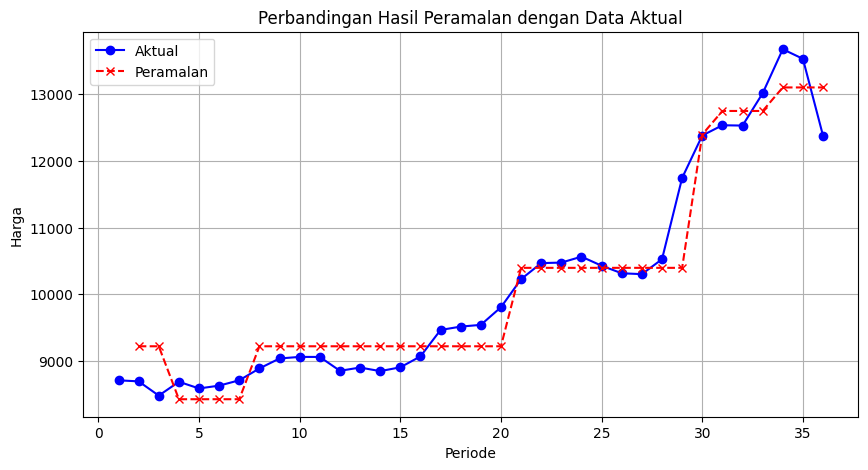

In [ ]:
# 15. Time Series Plot Perbandingan Hasil Peramalan dengan Data Aktual
plt.figure(figsize=(10,5))
plt.plot(df['Periode'], df['Harga'], marker='o', linestyle='-', color='b', label='Aktual')
plt.plot(df['Periode'], df['Forecast'], marker='x', linestyle='--', color='r', label='Peramalan')
plt.title('Perbandingan Hasil Peramalan dengan Data Aktual')
plt.xlabel('Periode')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 16. MAPE Hasil peramalan
mape = np.mean(np.abs((df['Harga'][1:] - df['Forecast'][1:]) / df['Harga'][1:])) * 100
print(f"MAPE Hasil Peramalan: {mape}%")

MAPE Hasil Peramalan: 2.9993441957633005%


In [ ]:
# 17. MAD (Mean Absolute Deviation)
mad = np.mean(np.abs(df['Harga'] - df['Forecast']))
print(f"MAD (Mean Absolute Deviation): {mad}")

MAD (Mean Absolute Deviation): 302.7540904761905


In [ ]:
# 18. Tabel Data dengan Hasil Peramalan
print("\nTabel Data dengan Hasil Peramalan:")
print(df[['Periode', 'Harga', 'Forecast']])


Tabel Data dengan Hasil Peramalan:
    Periode     Harga      Forecast
0         1   8710.44           NaN
1         2   8694.95   9220.975500
2         3   8481.43   9220.975500
3         4   8688.77   8427.131250
4         5   8588.59   8427.131250
5         6   8630.83   8427.131250
6         7   8711.19   8427.131250
7         8   8888.50   9220.975500
8         9   9038.14   9220.975500
9        10   9061.74   9220.975500
10       11   9061.05   9220.975500
11       12   8853.24   9220.975500
12       13   8902.12   9220.975500
13       14   8848.66   9220.975500
14       15   8905.52   9220.975500
15       16   9069.27   9220.975500
16       17   9465.63   9220.975500
17       18   9516.09   9220.975500
18       19   9542.12   9220.975500
19       20   9806.58   9220.975500
20       21  10227.61  10397.041056
21       22  10467.91  10397.041056
22       23  10475.91  10397.041056
23       24  10564.51  10397.041056
24       25  10428.81  10397.041056
25       26  10315.48  10397